In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
#load data
X = np.loadtxt("data_quality.txt", delimiter=",")

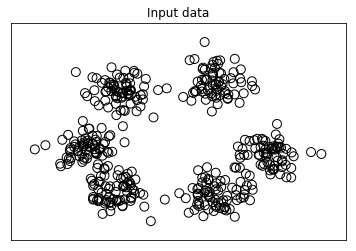

In [3]:
#input data visualization
plt.figure()
plt.scatter(X[:,0], X[:,1], color="black", s=80, marker="o", facecolors="none")
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.title("Input data")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
#variables initialization
scores = []
values = np.arange(2, 10)

In [5]:
for num_clusters in values : 
    #KMeans learning
    kmeans = KMeans(init="k-means++", n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    
    score = metrics.silhouette_score(X, kmeans.labels_, metric="euclidean", sample_size=len(X))
    
    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.477626248705

Number of clusters = 3
Silhouette score = 0.547174241173

Number of clusters = 4
Silhouette score = 0.579480188969

Number of clusters = 5
Silhouette score = 0.589003263565

Number of clusters = 6
Silhouette score = 0.609690411895

Number of clusters = 7
Silhouette score = 0.553014014114

Number of clusters = 8
Silhouette score = 0.501019912871

Number of clusters = 9
Silhouette score = 0.435674205261



Optimal number of clusters = 6


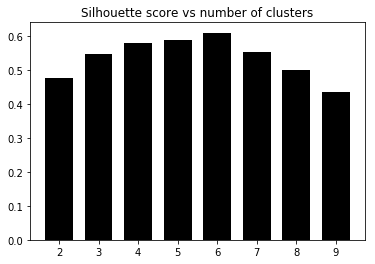

In [6]:
#visualization
plt.figure()
plt.bar(values, scores, width=0.7, color="black", align="center")
plt.title("Silhouette score vs number of clusters")

#finding optimal K with highest silhouette score
num_clusters = np.argmax(scores) + values[0]
print("\nOptimal number of clusters =", num_clusters)
plt.show()